1. why use census versus traffic zone data?
2. plot out distribution for week/day?

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Data preparation
### 1.1 Census Tracts

In [29]:
data_dir = "../raw_data/"
census_file = "/Census_Tracts/san_francisco-censustracts-2018-1-All-HourlyAggregate.csv"

In [4]:
census = pd.read_csv(data_dir+census_file)
census.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,6,5,17,2917.18,790.28,2810.98,1.32
1,3,38,20,339.74,254.41,287.54,1.67
2,2,61,7,1443.36,374.62,1397.73,1.29
3,7,25,2,152.00,180.40,95.34,2.61
4,2,79,22,2320.41,324.85,2299.22,1.14


In [58]:
tmp_ = census[(census['sourceid']==6 )&(census['dstid']==5)]

In [61]:
len(tmp_)
tmp_

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,6,5,17,2917.18,790.28,2810.98,1.32
284175,6,5,23,1965.00,110.49,1961.94,1.06
853456,6,5,0,2092.43,259.81,2078.03,1.12
1422668,6,5,7,2295.44,349.15,2269.66,1.16
1707158,6,5,13,2541.33,691.83,2461.42,1.28
3130329,6,5,22,2029.90,206.99,2019.58,1.11
3414860,6,5,18,2306.87,489.31,2261.93,1.21
3699342,6,5,10,2032.48,190.16,2024.32,1.09
3983755,6,5,14,2324.20,329.03,2302.42,1.14
4268229,6,5,16,2642.86,798.76,2526.37,1.35


There aren't any missing eg N/A data.

In [38]:
census.isnull().any(axis=0)

sourceid                                    False
dstid                                       False
hod                                         False
mean_travel_time                            False
standard_deviation_travel_time              False
geometric_mean_travel_time                  False
geometric_standard_deviation_travel_time    False
dtype: bool

In [18]:
group_census = census.groupby(by=['sourceid','dstid'])[['mean_travel_time']]

In [21]:
group_census.count().mean()

mean_travel_time    17.937299
dtype: float64

### 1.2 Traffic Analysis Zones

In [30]:
taz_file = "/Traffic_Analysis_Tracts/san_francisco-taz-2018-1-All-HourlyAggregate.csv"
taz = pd.read_csv(data_dir+taz_file)

In [31]:
group_taz = taz.groupby(by=['sourceid','dstid'])[['mean_travel_time']]

In [35]:
group_taz.count().mean()

mean_travel_time    15.240894
dtype: float64

### 1.3 weekly-level data in census

In [49]:
cweekly_file = "Census_Tracts/san_francisco-censustracts-2018-1-WeeklyAggregate.csv"
cweekly = pd.read_csv(data_dir + census_weekly_file)

In [50]:
cweekly.head()

,sourceid,dstid,dow,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,1829,2594,4,1615.17,544.28,1526.98,1.40
1,1919,1694,4,3981.88,912.37,3886.76,1.24
2,2356,331,3,965.52,325.81,918.00,1.36
3,2308,811,3,1603.71,590.20,1516.12,1.38
4,2323,661,3,334.06,185.17,291.79,1.69


In [51]:
group_cweekly = cweekly.groupby(by=['sourceid','dstid'])[['mean_travel_time']]

In [52]:
group_cweekly.count().mean()

mean_travel_time    6.406593
dtype: float64

## 2 Time granularity
### 2.1 Data counts distribution over region pairs

In [48]:
print(len(group_census.count()))
print(len(group_taz.count()))

570965
2515337


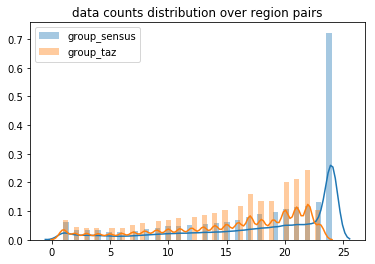

In [47]:
sns.distplot(group_census.count(),label ='group_sensus')
sns.distplot(group_taz.count(),label = 'group_taz').set_title('data counts distribution over region pairs')
plt.legend()
plt.show()

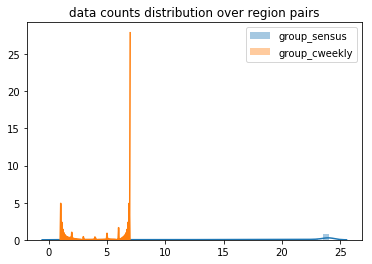

In [53]:
sns.distplot(group_census.count(),label ='group_sensus')
sns.distplot(group_cweekly.count(),label = 'group_cweekly').set_title('data counts distribution over region pairs')
plt.legend()
plt.show()

Text(0,0.5,'frequency')

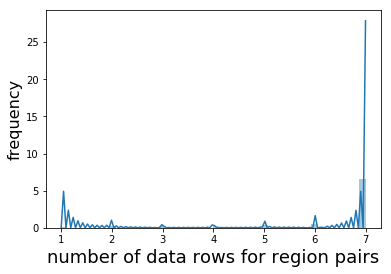

In [56]:
sns.distplot(group_cweekly.count(),label = 'group_cweekly')
plt.xlabel('number of data rows for region pairs', fontsize=18)
plt.ylabel('frequency', fontsize=16)